In [1]:
# Step 1: Setup Environment
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images
import shutil

In [2]:
# Clone the YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 16807, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 16807 (delta 55), reused 61 (delta 26), pack-reused 16679
Receiving objects: 100% (16807/16807), 15.47 MiB | 31.42 MiB/s, done.
Resolving deltas: 100% (11534/11534), done.
/kaggle/working/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 699.1 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.2/825.2 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 66.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.0.3
    Uninstalling setuptools-69.0.3:
      Successfully uninstalled setuptools-69.0.3
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Succ

In [3]:
# Manually download the Arial.ttf font
!mkdir -p /root/.config/Ultralytics
!wget -O /root/.config/Ultralytics/Arial.ttf https://ultralytics.com/assets/Arial.ttf

--2024-07-22 13:44:01--  https://ultralytics.com/assets/Arial.ttf
Resolving ultralytics.com (ultralytics.com)... 75.2.70.75, 99.83.190.102
Connecting to ultralytics.com (ultralytics.com)|75.2.70.75|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ultralytics.com/assets/Arial.ttf [following]
--2024-07-22 13:44:01--  https://www.ultralytics.com/assets/Arial.ttf
Resolving www.ultralytics.com (www.ultralytics.com)... 104.18.1.125, 104.18.0.125, 2606:4700::6812:17d, ...
Connecting to www.ultralytics.com (www.ultralytics.com)|104.18.1.125|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/ultralytics/assets/releases/download/v0.0.0/Arial.ttf [following]
--2024-07-22 13:44:02--  https://github.com/ultralytics/assets/releases/download/v0.0.0/Arial.ttf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request 

In [4]:
# Verify the downloaded file
assert os.path.exists('/root/.config/Ultralytics/Arial.ttf'), "Arial.ttf font file was not downloaded successfully."

In [5]:
# Prepare Dataset
dataset_base_path = '/kaggle/input/icdec-challenge/juvdv2-vdvwc-main'
annotations_base_path = os.path.join(dataset_base_path, 'Annotation')
images_base_path = dataset_base_path

In [6]:
# Define directory paths for training and validation data
train_images_path = [
    os.path.join(images_base_path, 'Train/Rainny/Day'),
    os.path.join(images_base_path, 'Train/Rainny/Night'),
    os.path.join(images_base_path, 'Train/Sunny/Day'),
    os.path.join(images_base_path, 'Train/Sunny/Night')
]

val_images_path = [
    os.path.join(images_base_path, 'Val/Rainny/Day'),
    os.path.join(images_base_path, 'Val/Rainny/Night'),
    os.path.join(images_base_path, 'Val/Sunny/Day'),
    os.path.join(images_base_path, 'Val/Sunny/Night')
]

train_labels_path = [
    os.path.join(annotations_base_path, 'Train/Rainny/Day'),
    os.path.join(annotations_base_path, 'Train/Rainny/Night'),
    os.path.join(annotations_base_path, 'Train/Sunny/Day'),
    os.path.join(annotations_base_path, 'Train/Sunny/Night')
]

val_labels_path = [
    os.path.join(annotations_base_path, 'Val/Rainny/Day'),
    os.path.join(annotations_base_path, 'Val/Rainny/Night'),
    os.path.join(annotations_base_path, 'Val/Sunny/Day'),
    os.path.join(annotations_base_path, 'Val/Sunny/Night')
]

In [7]:
# Consolidate image and label paths into training and validation directories
train_images = []
val_images = []
train_labels = []
val_labels = []

for path in train_images_path:
    train_images.extend([os.path.join(path, img) for img in os.listdir(path) if img.endswith('.jpg')])

for path in val_images_path:
    val_images.extend([os.path.join(path, img) for img in os.listdir(path) if img.endswith('.jpg')])

for path in train_labels_path:
    train_labels.extend([os.path.join(path, lbl) for lbl in os.listdir(path) if lbl.endswith('.txt')])

for path in val_labels_path:
    val_labels.extend([os.path.join(path, lbl) for lbl in os.listdir(path) if lbl.endswith('.txt')])

In [8]:
# Ensure directories exist
os.makedirs('/kaggle/working/train/images', exist_ok=True)
os.makedirs('/kaggle/working/train/labels', exist_ok=True)
os.makedirs('/kaggle/working/val/images', exist_ok=True)
os.makedirs('/kaggle/working/val/labels', exist_ok=True)

In [9]:
# Copy images and labels to consolidated directories
for path in train_images_path:
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            shutil.copy(os.path.join(path, img), '/kaggle/working/train/images')

for path in val_images_path:
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            shutil.copy(os.path.join(path, img), '/kaggle/working/val/images')

for path in train_labels_path:
    for lbl in os.listdir(path):
        if lbl.endswith('.txt'):
            shutil.copy(os.path.join(path, lbl), '/kaggle/working/train/labels')

for path in val_labels_path:
    for lbl in os.listdir(path):
        if lbl.endswith('.txt'):
            shutil.copy(os.path.join(path, lbl), '/kaggle/working/val/labels')

In [10]:
# Create data configuration file for YOLOv5
data_yaml = {
    'train': '/kaggle/working/train/images',
    'val': '/kaggle/working/val/images',
    'nc': 15,  # Update this to the correct number of classes
    'names': ['vehicle', 'class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11', 'class12', 'class13', 'class14']  # Update with correct class names
}

with open('/kaggle/working/yolov5/data/vdvwc.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=False)

In [11]:
# Train the YOLOv5 Model
!python train.py --img 640 --batch 32 --epochs 100 --data /kaggle/working/yolov5/data/vdvwc.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt --name vdvwc

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-07-22 13:45:16.884471: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 13:45:16.884583: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 13:45:17.179001: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train:

In [12]:
#Saving the Model's output
import shutil
import os

# Create a directory to store the weights
os.makedirs('/kaggle/working/saved_models', exist_ok=True)

# Copy the best weights
shutil.copy('/kaggle/working/yolov5/runs/train/vdvwc/weights/best.pt', '/kaggle/working/saved_models/best_vdvwc.pt')

# Copy the last weights
shutil.copy('/kaggle/working/yolov5/runs/train/vdvwc/weights/last.pt', '/kaggle/working/saved_models/last_vdvwc.pt')

'/kaggle/working/saved_models/last_vdvwc.pt'

In [13]:
import torch

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/kaggle/working/saved_models/best_vdvwc.pt')

# Set the model to evaluation mode
model.eval()

/opt/conda/lib/python3.10/site-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-7-22 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [14]:
# Step 4: Validate the Model
!python val.py --weights runs/train/vdvwc/weights/best.pt --data /kaggle/working/yolov5/data/vdvwc.yaml --img 640

val: data=/kaggle/working/yolov5/data/vdvwc.yaml, weights=['runs/train/vdvwc/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /kaggle/working/val/labels.cache... 200 images, 0 backgrounds, 0 c
                 Class     Images  Instances          P          R      mAP50   
                   all        200       1199       0.62      0.451      0.518      0.251
               vehicle        200        743      0.773      0.806      0.818      0.381
                class1        200        125       0.65      0.656      0.686      0.388
              

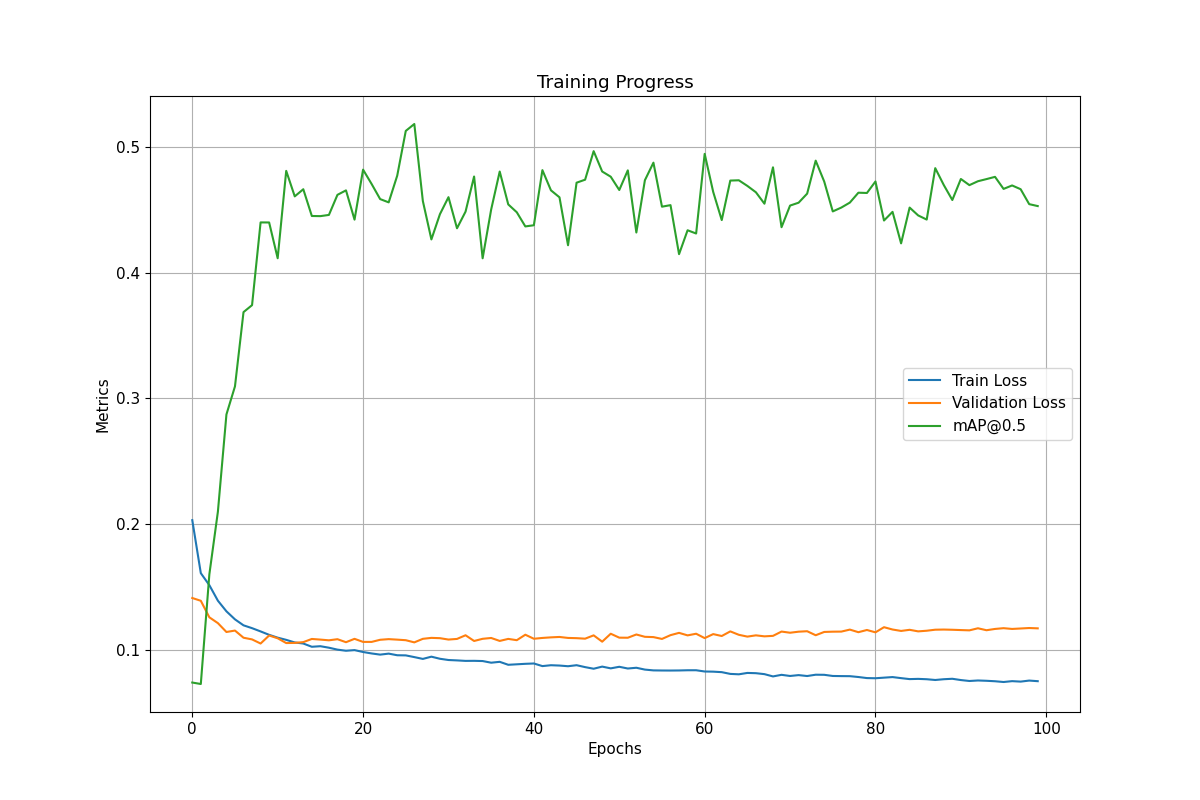

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
results_df = pd.read_csv('/kaggle/working/yolov5/runs/train/vdvwc/results.csv')

# Strip whitespace from column names
results_df.columns = results_df.columns.str.strip()

# Extract epoch and relevant metrics
epochs = results_df['epoch']
train_loss = results_df['train/box_loss'] + results_df['train/obj_loss'] + results_df['train/cls_loss']
val_loss = results_df['val/box_loss'] + results_df['val/obj_loss'] + results_df['val/cls_loss']
mAP = results_df['metrics/mAP_0.5']

# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.plot(epochs, mAP, label='mAP@0.5')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Training Progress')
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('/kaggle/working/training_progress.png')
plt.close()

# Display the saved image
from IPython.display import Image, display
display(Image('/kaggle/working/training_progress.png'))

In [18]:
test_image_path = '/kaggle/working/val/images/'
!python detect.py --weights runs/train/vdvwc/weights/best.pt --img 640 --source {test_image_path} --name vdvwc_results

detect: weights=['runs/train/vdvwc/weights/best.pt'], source=/kaggle/working/val/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=vdvwc_results, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/200 /kaggle/working/val/images/night (651).jpg: 384x640 1 vehicle, 7 class1s, 1 class4, 1 class8, 55.6ms
image 2/200 /kaggle/working/val/images/night (652).jpg: 384x640 5 class1s, 3 class2s, 1 class4, 1 class11, 7.6ms
image 3/200 /kaggle/working/val/images/night (653).jpg: 384x640 2 vehicles, 6 class1s, 

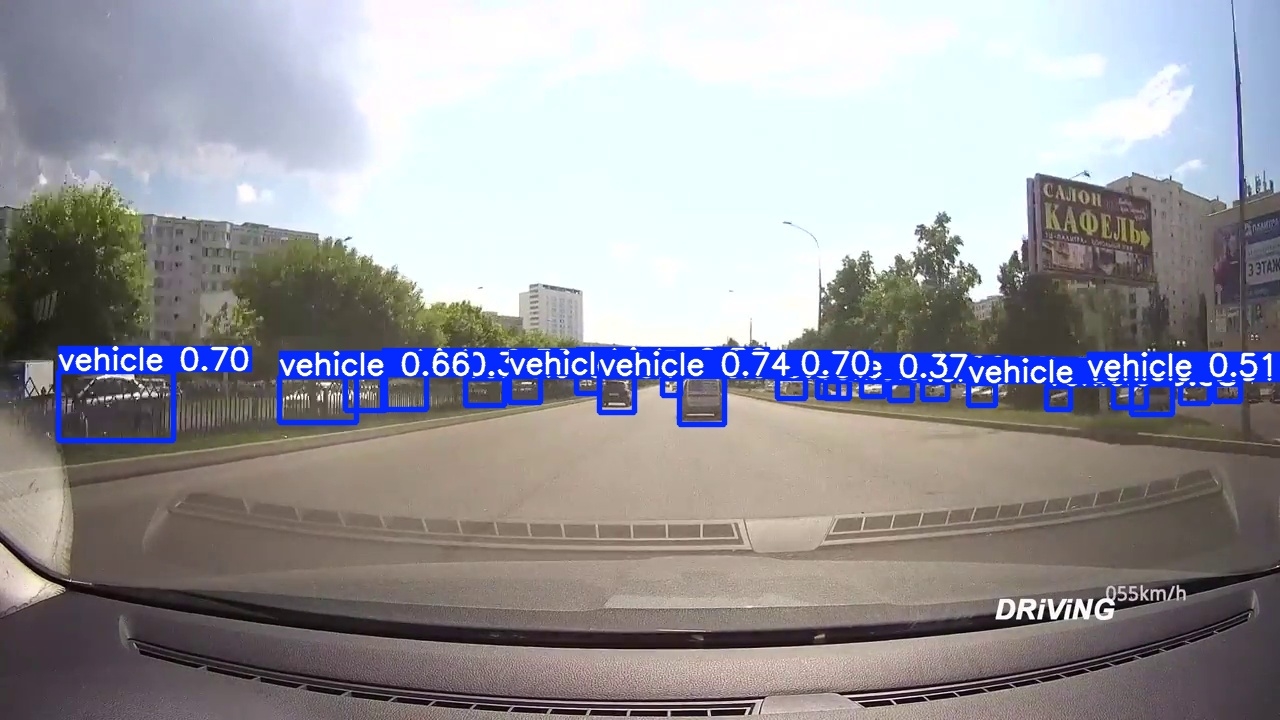

In [19]:
import os
from IPython.display import Image, display

result_image_path = '/kaggle/working/yolov5/runs/detect/vdvwc_results'
result_images = os.listdir(result_image_path)
if result_images:
    display(Image(os.path.join(result_image_path, result_images[0])))
else:
    print("No result images found.")

In [20]:
# Test the model
!python detect.py --weights runs/train/vdvwc/weights/best.pt --data /kaggle/working/yolov5/data/vdvwc.yaml --img 640

detect: weights=['runs/train/vdvwc/weights/best.pt'], source=data/images, data=/kaggle/working/yolov5/data/vdvwc.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/2 /kaggle/working/yolov5/data/images/bus.jpg: 640x480 1 class1, 1 class4, 1 class5, 48.8ms
image 2/2 /kaggle/working/yolov5/data/images/zidane.jpg: 384x640 (no detections), 52.0ms
Speed: 0.4ms pre-process, 50.4ms inference, 76.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [21]:
# Analyze results
import os
from IPython.display import Image, display

result_image_path = '/kaggle/working/yolov5/runs/detect/vdvwc_results'
result_images = os.listdir(result_image_path)

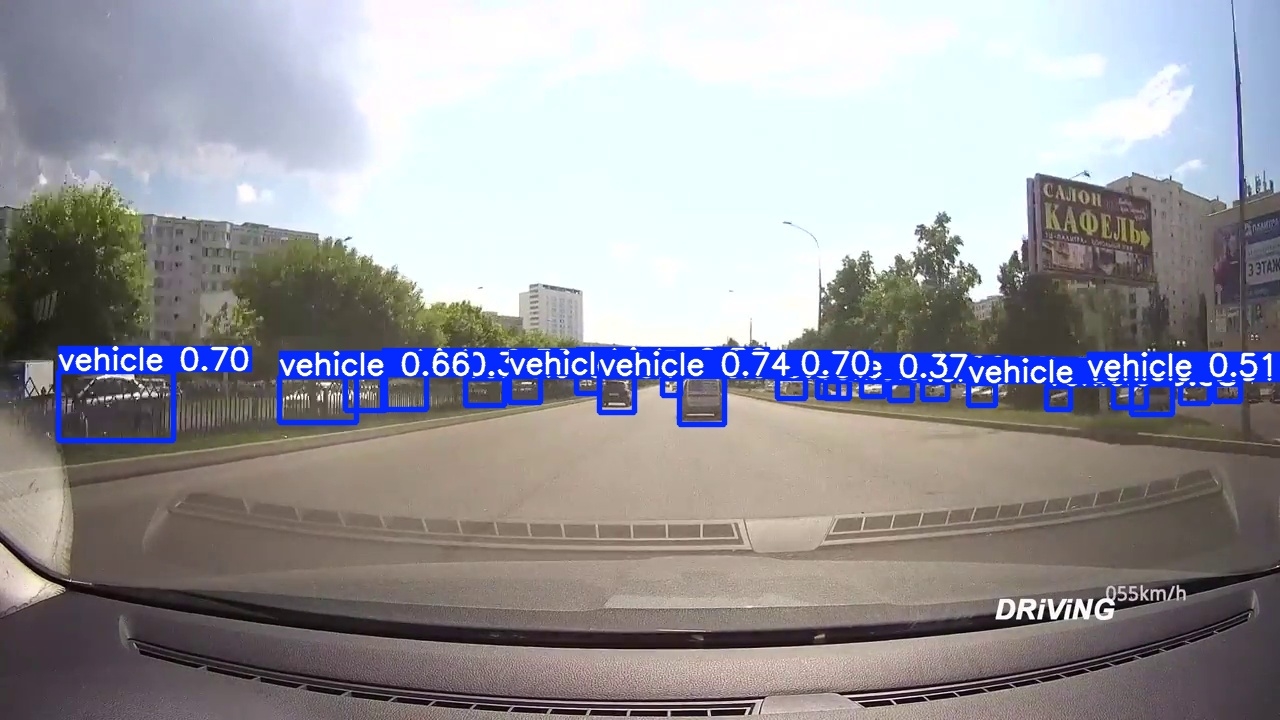

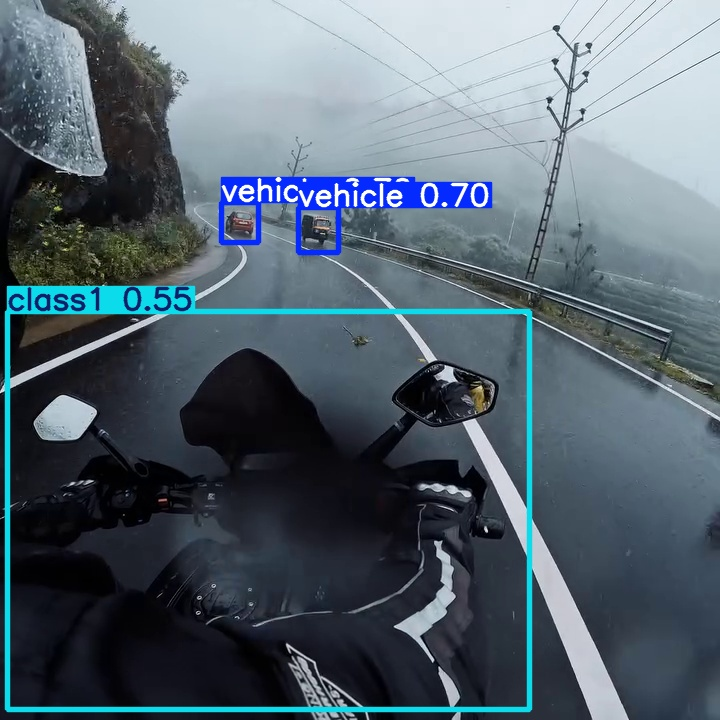

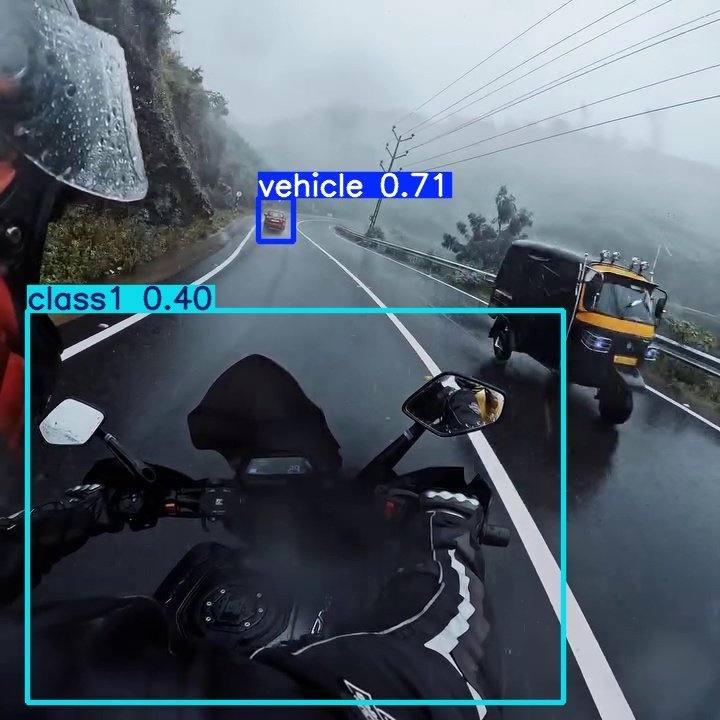

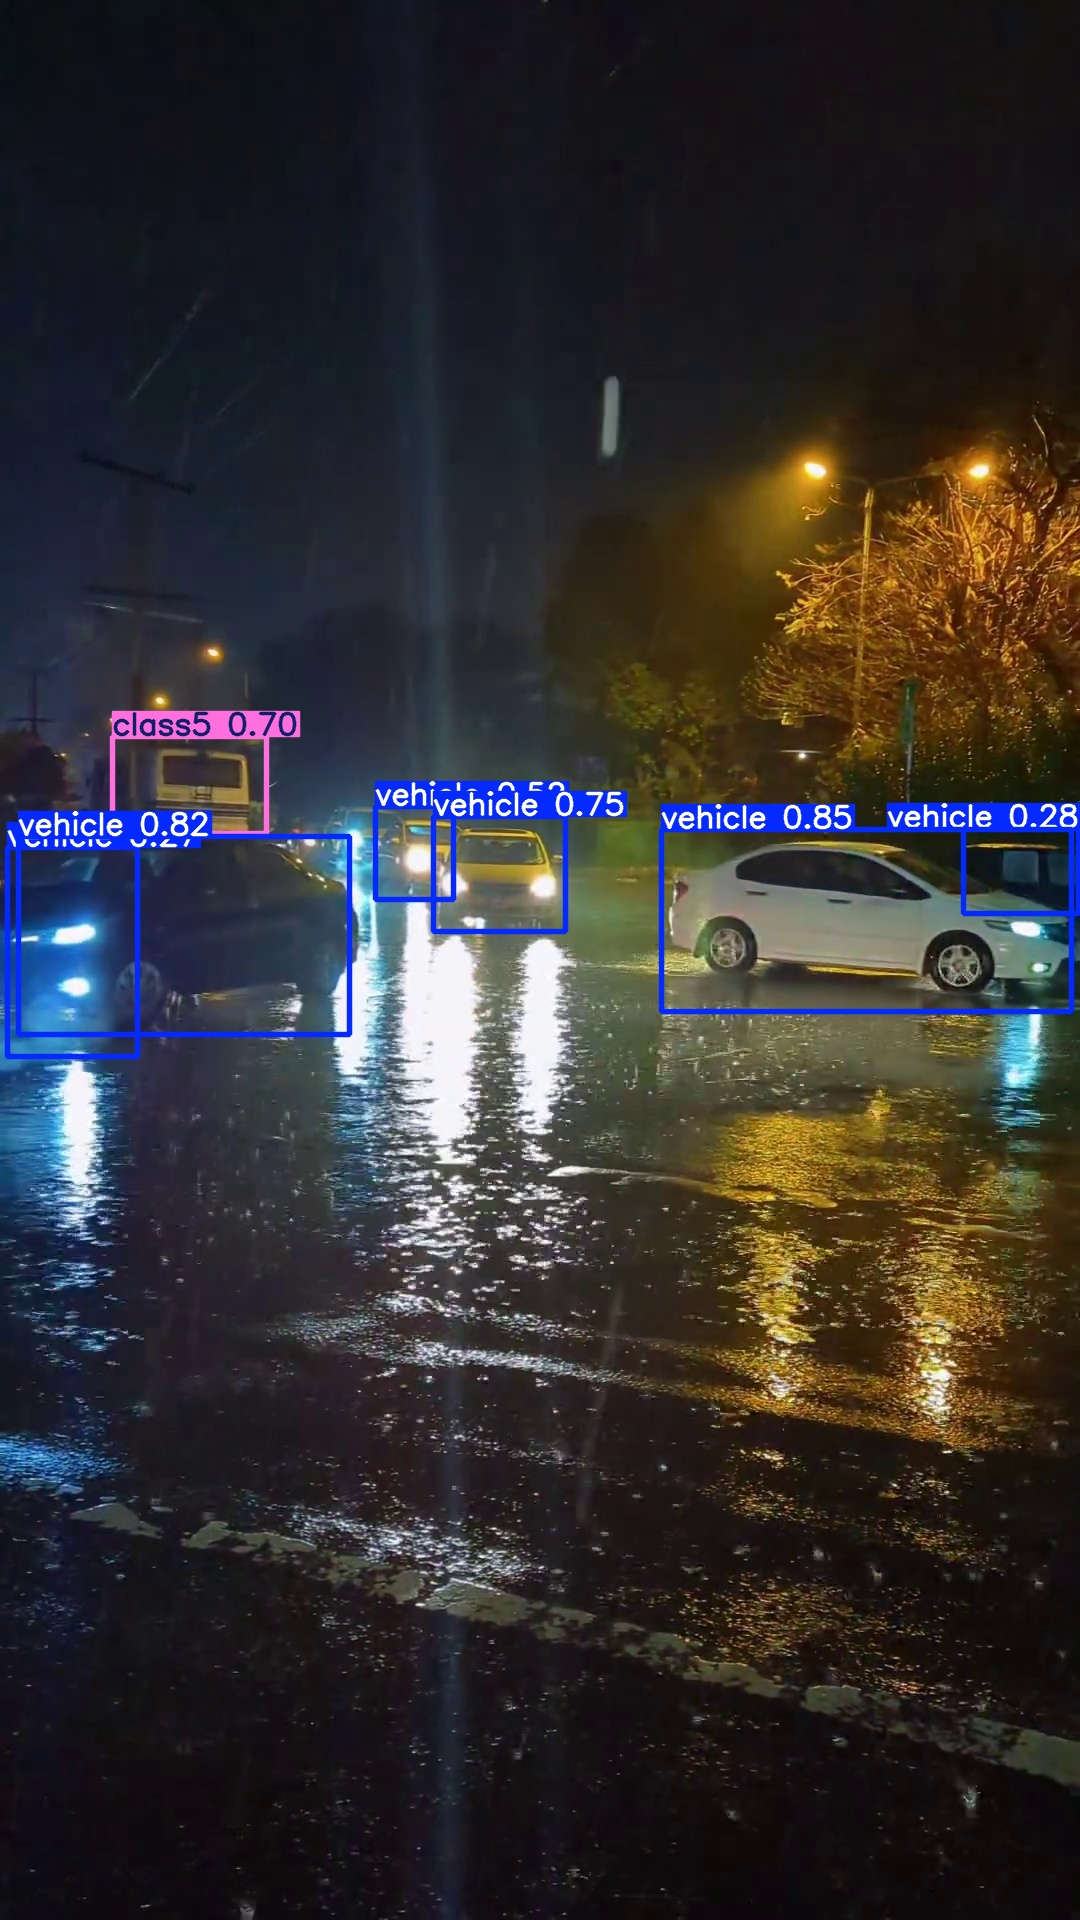

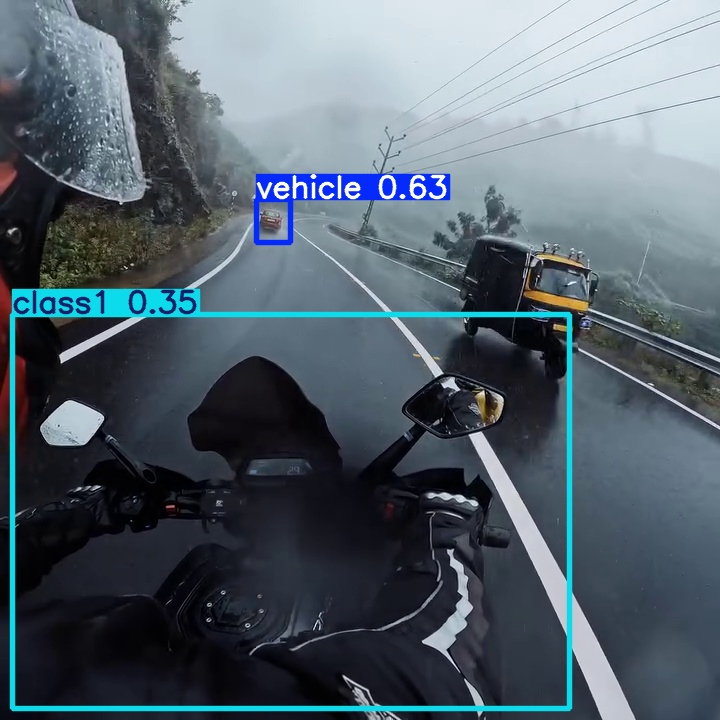

In [22]:
# Display the first few results
for img in result_images[:5]:
    display(Image(os.path.join(result_image_path, img)))

In [23]:
# Save the model
import shutil

best_weights_path = 'runs/train/vdvwc/weights/best.pt'
shutil.copy(best_weights_path, '/kaggle/working/yolov5/best_vdvwc_model.pt')

'/kaggle/working/yolov5/best_vdvwc_model.pt'

In [24]:
import yaml
import os
import numpy as np
from pathlib import Path

In [25]:
# Load validation results
val_results_file = '/kaggle/working/yolov5/runs/train/vdvwc/results.csv'
with open(val_results_file, 'r') as f:
    lines = f.readlines()

In [26]:
# Print the first few lines of the results file
print("Contents of the results file:")
for line in lines[:10]:  # Print first 10 lines
    print(line.strip())

Contents of the results file:
epoch,      train/box_loss,      train/obj_loss,      train/cls_loss,   metrics/precision,      metrics/recall,     metrics/mAP_0.5,metrics/mAP_0.5:0.95,        val/box_loss,        val/obj_loss,        val/cls_loss,               x/lr0,               x/lr1,               x/lr2
0,            0.091425,            0.059996,            0.051534,             0.90166,            0.075668,            0.073774,            0.028544,            0.061122,            0.044159,            0.035746,             0.07038,           0.0032911,           0.0032911
1,            0.071743,            0.052643,            0.036418,              0.8464,             0.10715,            0.072612,             0.02219,            0.069438,            0.039034,            0.030343,            0.040314,           0.0065589,           0.0065589
2,            0.070061,             0.04985,             0.03132,             0.34167,             0.21388,             0.15984,            0

In [27]:
import pandas as pd

In [28]:
# Read the CSV file
results_df = pd.read_csv(val_results_file)

In [29]:
# Get the last row (assuming it contains the final results)
final_results = results_df.iloc[-1]

In [30]:
# Extract mAP and calculate F1-score
mAP = final_results['     metrics/mAP_0.5']
precision = final_results['   metrics/precision']
recall = final_results['      metrics/recall']

In [31]:
# Calculate F1-score
F1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [32]:
print(f'mAP: {mAP:.4f}')
print(f'F1-Score: {F1_score:.4f}')

mAP: 0.4528
F1-Score: 0.4711
